<a href="https://colab.research.google.com/github/jadaliha/DS_coding_practices/blob/main/Functional_programming_and_decorators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agenda

**Why Functional Programming Is on the Rise Again?**

This week we are going to cover the following topics:
* functional programming paradigm vs. object-oriented
* What is a decorator and how to use them
* Most useful decorators for DS
* Introduction to **functools** package


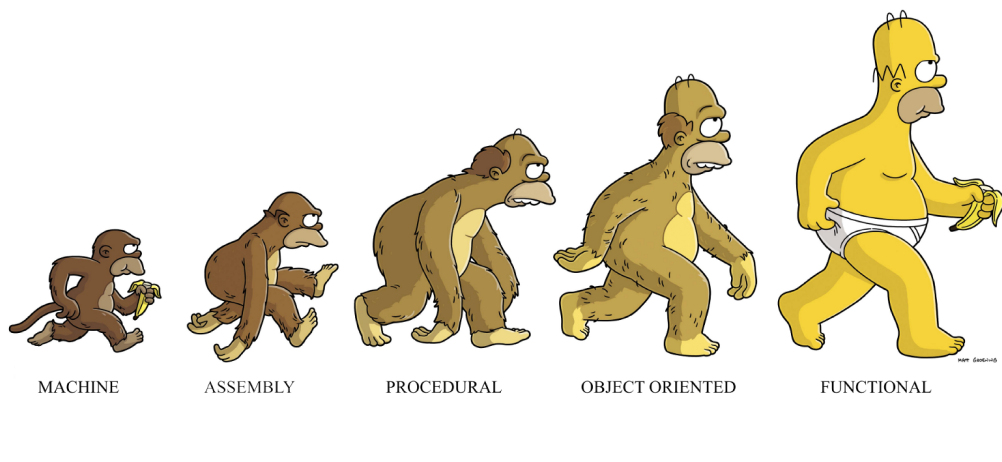

# Concepts of Functional Programming

**Pure Functions:** These functions have two main properties. First, they always produce the same output for the same arguments irrespective of anything else.

**Recursion:** There are no “for” or “while” loop in functional languages. 

**Functions are First-Class and can be Higher-Order:** Functions can be passed to functions as a parameter, can be returned from functions or stored in data structures.

**Variables are Immutable:** In functional programming, we can’t modify a variable after it’s been initialized.

In [ ]:
list1 = [1, 2, 3, 4, 5, 'e']

def sqr(x): 
  return x ** 2

int_list = filter(lambda x: type(x)==int, list1)

square_values = list(
    map(
        sqr, 
        int_list
        )
)

square_values

[1, 4, 9, 16, 25]

Sometimes writing code with the functional paradigm in mind may take more time to implement, but if you have to share your code with others, it is more readable.

In [2]:
list1 = [1, 2, 3, 4, 5, 'e']
[x**2 for x in list1 if type(x)==int]

[1, 4, 9, 16, 25]

# Functional Programming vs. Object Oriented Programming

Object-oriented languages are good when you have a fixed set of operations, you primarily add new things.
Functional languages are good when you have a fixed set of things, you primarily add new operations

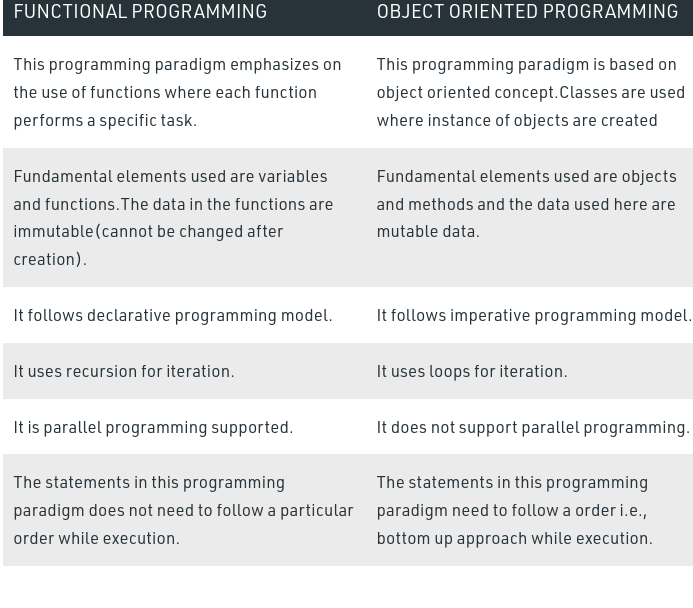



# Primer on Python Decorators and Clouser

Probably most functions DS are familiar with are either defined in module/global scope or within classes i.e methods. However Python allows us to define our functions in a local scope i.e within a function.


By definition, a decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it. 

**a func(takes my function) -> return the modified version of my function**

Decorators are a very powerful and useful tool in Python since it allows programmers to modify the behaviour of a function or class.

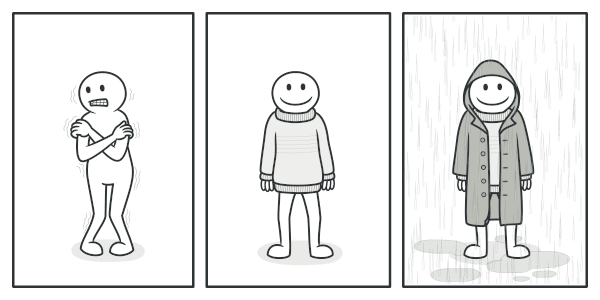

In [ ]:
# importing libraries
import time
import math
 
# decorator to calculate duration
# taken by any function.
def calculate_time(func):
     
    # added arguments inside the inner1,
    # if function takes any arguments,
    # can be added like this.
    def inner1(*args, **kwargs):
 
        # storing time before function execution
        begin = time.time()
        for retry in range(10):
          result = func(*args, **kwargs)
 
        # storing time after function execution
        end = time.time()
        print("Total time taken in : ", func.__name__, end - begin)
        return result
 
    return inner1
 

In [ ]:
# this can be added to any function present,
# in this case to calculate a factorial
@calculate_time
def factorial_1(num):
    return math.factorial(num)

@calculate_time
def factorial_2(num):
    y = 1
    for x in range(num):
      y *= (x+1)
    return y

# calling the function.
factorial_1(100)

factorial_2(100)

Total time taken in :  factorial_1 1.7404556274414062e-05
Total time taken in :  factorial_2 0.00018787384033203125


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

## @singleton

Singletons are in a sense a version of global types. This means that the types are defined to only exist once. 


In [ ]:
from dataclasses import dataclass

def singleton(cls):
    instances = {}
    def wrapper(*args, **kwargs):
        if cls not in instances:
          instances[cls] = cls(*args, **kwargs)
        return instances[cls]
    return wrapper

@singleton
@dataclass
class Person:
  name:str

p1 = Person('Mahdi')
p2 = Person('James')
display(
    p1,
    p2
)

Person(name='Mahdi')

Person(name='Mahdi')

##@singledispatch
Single dispatch is a programming technique that is quite commonplace in many programming languages because of just how great of a way it is to program.

In [ ]:
! pip install num2words

In [ ]:
from functools import singledispatch
from num2words import num2words
@singledispatch
def fun(arg, verbose=False):
    if verbose:
        print("Let me just say,", end=" ")
    print(arg)
@fun.register
def _(arg: int, verbose=False):
    if verbose:
        print("Strength in numbers, eh?", end=" ")
    print(num2words(arg))
@fun.register
def _(arg: list, verbose=False):
    if verbose:
        print("Enumerate this:")
    for i, elem in enumerate(arg):
        print(i, elem)

In [1]:
fun([1,10], verbose = True)

NameError: ignored

In [ ]:
fun((1,10))

(1, 10)


In [ ]:
fun(45)

forty-five


## Some other useful decorators


*   @staticmethod
*   @abstractmethod


---



# Functools module in Python
This module provides functions for working with other functions and callable objects to use or extend them without completely rewriting them.

## @lru_cache
This decorator can be used to speed up consecutive runs of functions and operations using cache.

In [ ]:
from functools import lru_cache

@lru_cache(2)
def factorial(n):
    print(f"n is {n}")
    return n * factorial(n-1) if n else 1

factorial(3)

n is 3
n is 2
n is 1
n is 0


6

In [ ]:
factorial(3)

n is 3
n is 2
n is 1
n is 0


6

In [ ]:
factorial(6)

n is 6
n is 5
n is 4


720

## partial and reduce functions

In [ ]:
from functools import partial

def power(a, b):
    return a**b

# partial functions
pow2 = partial(power, b=2)
print(pow2(4))

16


In [ ]:
from functools import reduce
list1 = [2, 4, 7, 9, 1, 3]
sum_of_list1 = reduce(lambda a, b:a + b, list1)
 
print('Sum of list1 :', sum_of_list1)

Sum of list1 : 26


#Conclusion

* Python is not primarily a functional language, it is able to support it though.

* A **pure function** is a function whose output value follows solely from its input values.

* Decorators are incredibly useful. They can be incredibly helpful at speeding up code, simplify, and modularize.

* Use *map(aFunction, aSequence)*, *filter(aFunction, aSequence)*, *reduce(aFunction, aSequence)* to replace **for** and **if** loop whenever possible.





# Bonus (How to use closure instead of class)
The local functions we have looked at so far have no definite way of interacting with the enclosing scope, that is about to change. Local functions can make use of variables in their enclosing scope.

How to use closure (function) instead of class

In [ ]:
def person(name,age):
  def set_name(_name):
    nonlocal name
    name = _name
    pass
  def greet():
    return f'Hello {name}.'
  return locals()

# you can even add static methods
person.static_method = lambda:f'Nothing happends!'

# create an instance of person
p1 = person('Mahdi',37)

# calling a method of person
p1['greet']()

'Hello Mahdi.'

In [ ]:
person.static_method()

'Nothing happends!'

In [ ]:
p1['set_name']('Josh')
p1['name'] = 'Chris'
display(
    p1,
    p1['greet']()
)

{'age': 37,
 'set_name': <function __main__.person.<locals>.set_name(_name)>,
 'greet': <function __main__.person.<locals>.greet()>,
 'name': 'Chris'}

'Hello Josh.'

In [ ]:
# p1['name']
p1['greet']()

'Hello Mahdi.'

In [ ]:
name = 'John'
p1['greet']()

'Hello Ali.'

In [ ]:
def I_say_hi(p):
  def say_hi():
    return f"{p['greet']()} I'm Mahdi"
  return locals()

In [ ]:
m = I_say_hi(p1)
m['say_hi']()

"Hello Ali. I'm Mahdi"

In [ ]:
p1

{'age': 37,
 'set_name': <function __main__.person.<locals>.set_name(_name)>,
 'greet': <function __main__.person.<locals>.greet()>,
 'name': 'Mahdi'}

In [ ]:
dir(p1.__class__)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']